In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
path = "/content/content/MyDrive/HK1_year2/FDA/hr_data.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
data.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
data.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data.keys()

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [ ]:
data.shape

(14999, 9)

In [ ]:
data.isnull()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False


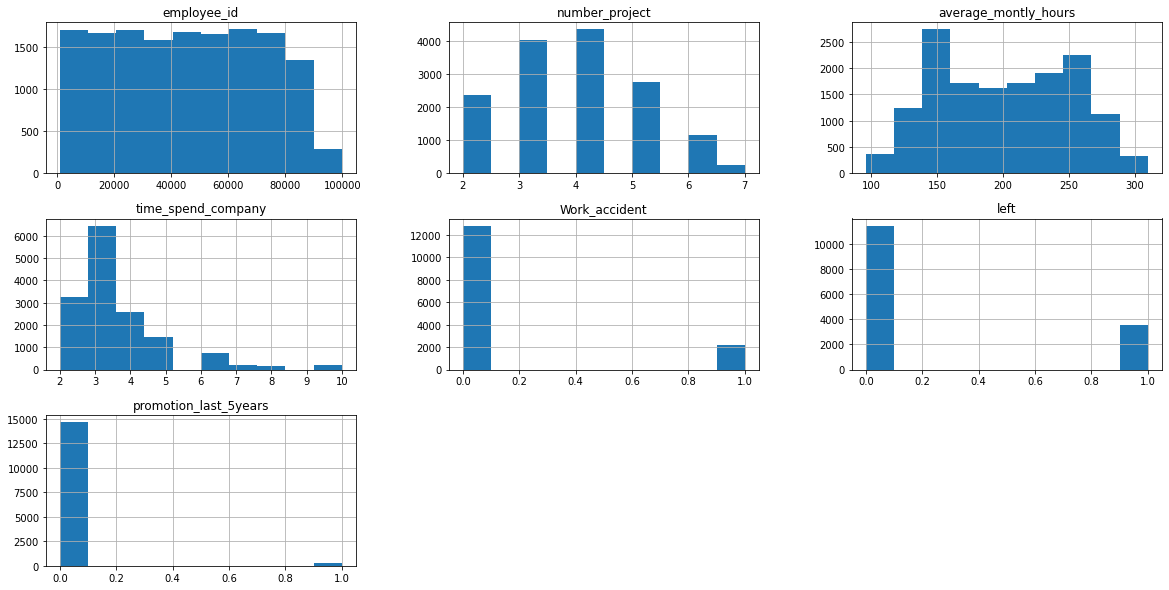

In [ ]:
data.hist(figsize = (20,10));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


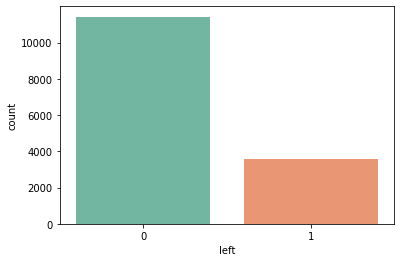

In [ ]:
sns.countplot(data.left, palette = "Set2")

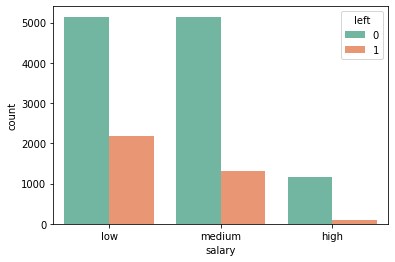

In [ ]:
sns.countplot(x = 'salary' ,hue ='left' ,palette = "Set2" , data= data)

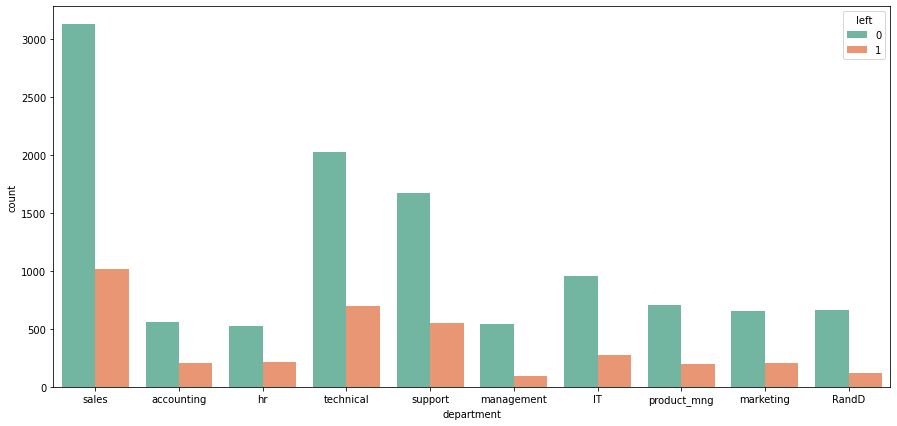

In [ ]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'department' ,hue ='left' ,palette = "Set2" , data= data)

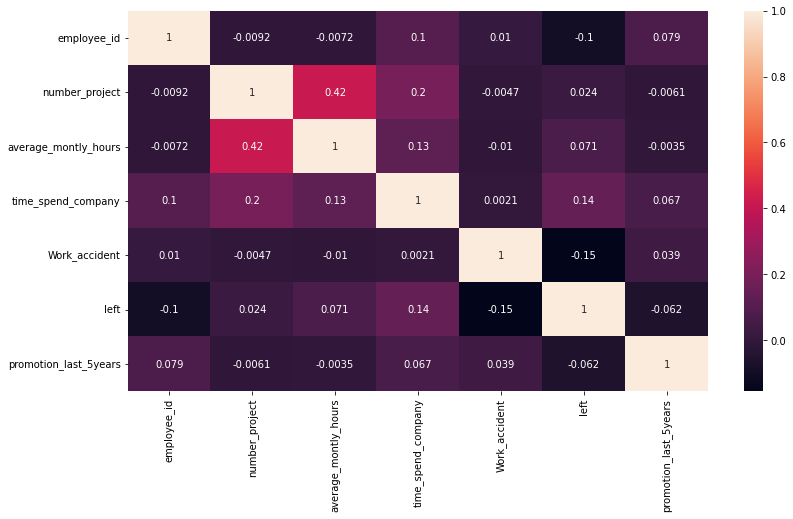

In [ ]:
plt.figure(figsize = (13, 7))
sns.heatmap(data.corr(), annot = True)

In [ ]:
data_final = data.drop(columns='employee_id')
data_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,2,157,3,0,1,0,sales,low
1,5,262,6,0,1,0,sales,medium
2,7,272,4,0,1,0,sales,medium
3,5,223,5,0,1,0,sales,low
4,2,159,3,0,1,0,sales,low


In [ ]:
data_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,
IT,4683,248119,4256,164,273,3
RandD,3033,158030,2650,134,121,27
accounting,2934,154292,2702,96,204,14
hr,2701,146828,2480,89,215,15
management,2432,126787,2711,103,91,69
marketing,3164,171073,3063,138,203,43
product_mng,3434,180369,3135,132,198,0
sales,15634,831773,14631,587,1014,100
support,8479,447490,7563,345,555,20


In [ ]:
data_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [ ]:
data_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
data_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
categorial = ['department','salary']
data_final = pd.get_dummies(data_final, columns=categorial, drop_first=True)
data_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:

X = data_final.drop(['left'],axis=1).values

y = data_final['left'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.453299,0.167493,1.046411,-0.413496,6.982714,-0.232174,-0.234444,-0.231261,-0.205648,4.051083,-0.245978,-0.620411,-0.417751,-0.477444,-0.983656,1.162271
1,-1.453299,-1.455873,-0.331869,-0.413496,-0.143211,-0.232174,-0.234444,-0.231261,-0.205648,-0.246848,-0.245978,-0.620411,2.393769,-0.477444,1.016616,-0.860385
2,0.163634,1.149529,-0.331869,2.418401,-0.143211,-0.232174,-0.234444,-0.231261,-0.205648,-0.246848,-0.245978,-0.620411,-0.417751,2.094484,1.016616,-0.860385
3,0.163634,-0.313505,-0.331869,2.418401,-0.143211,-0.232174,-0.234444,-0.231261,-0.205648,-0.246848,-0.245978,-0.620411,-0.417751,2.094484,-0.983656,1.162271
4,-1.453299,0.768739,-0.331869,2.418401,-0.143211,-0.232174,-0.234444,-0.231261,-0.205648,-0.246848,-0.245978,1.611835,-0.417751,-0.477444,-0.983656,1.162271


In [ ]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-3.718861e-16,3.113150e-17,-1.969406e-16,-2.998099e-16,-7.241458e-17,1.005006e-15,-6.151856e-16,6.111250e-16,-2.693552e-16,-1.248306e-15,-1.187735e-16,-8.689750e-16,2.402540e-17,7.552774e-16,-3.248505e-16,4.466694e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.453299e+00,-2.097203e+00,-1.021008e+00,-4.134964e-01,-1.432108e-01,-2.321742e-01,-2.344437e-01,-2.312614e-01,-2.056484e-01,-2.468475e-01,-2.459777e-01,-6.204109e-01,-4.177513e-01,-4.774445e-01,-9.836558e-01,-8.603847e-01
25%,-6.448326e-01,-8.947097e-01,-3.318688e-01,-4.134964e-01,-1.432108e-01,-2.321742e-01,-2.344437e-01,-2.312614e-01,-2.056484e-01,-2.468475e-01,-2.459777e-01,-6.204109e-01,-4.177513e-01,-4.774445e-01,-9.836558e-01,-8.603847e-01
50%,1.636338e-01,-3.292282e-02,-3.318688e-01,-4.134964e-01,-1.432108e-01,-2.321742e-01,-2.344437e-01,-2.312614e-01,-2.056484e-01,-2.468475e-01,-2.459777e-01,-6.204109e-01,-4.177513e-01,-4.774445e-01,-9.836558e-01,-8.603847e-01
75%,9.721002e-01,8.889887e-01,3.572709e-01,-4.134964e-01,-1.432108e-01,-2.321742e-01,-2.344437e-01,-2.312614e-01,-2.056484e-01,-2.468475e-01,-2.459777e-01,1.611835e+00,-4.177513e-01,-4.774445e-01,1.016616e+00,1.162271e+00
max,2.589033e+00,2.191690e+00,4.492109e+00,2.418401e+00,6.982714e+00,4.307112e+00,4.265417e+00,4.324111e+00,4.862668e+00,4.051083e+00,4.065408e+00,1.611835e+00,2.393769e+00,2.094484e+00,1.016616e+00,1.162271e+00


In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 75.33%
[[3348   87]
 [1023   42]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      3435
           1       0.33      0.04      0.07      1065

    accuracy                           0.75      4500
   macro avg       0.55      0.51      0.46      4500
weighted avg       0.66      0.75      0.67      4500

